<a href="https://colab.research.google.com/github/Tomi0589/coder-ciencia-de-datos/blob/main/Segunda_pre__entrega__proyecto_final_Alvarez_Tomas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

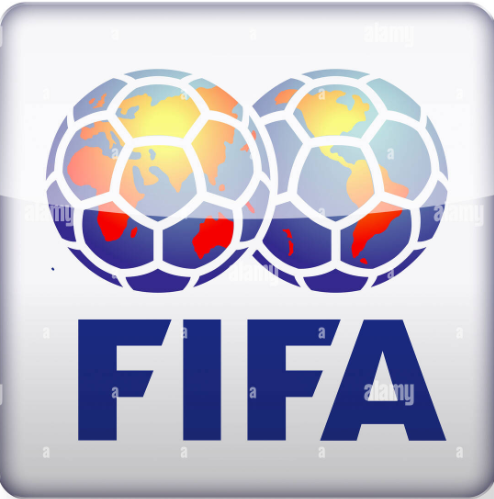


#Introduccion:
Para el presente trabajo se recolecto la información relacionada a las 10 mil tarjetas de
jugadores de Futbol disponibles de la edicion de FIFA23, incluidas de edición especial.
Las mismas muestran las caracteristicas del jugador: nombre, nacionalidad,  posicion, tipo de carta, equipo y liga.
Tambien contiene un puntaje general asigando y un conjunto de 6 valores que conformarian los atributos del jugador: disparo, pase, regate, fisicalidad, defensa y velocidad.
En algunos casos se presentan valores nulos en equipo o liga, pero esto se debe a que a la fecha en la que hizo la muestra el jugador no contaba con un equipo.

---




## Objetivos:
Para este trabajo se busca poder estudiar:

  

▶  	Analizar la distribución de las calificaciones de los jugadores.

▶  Desempeños de las diferentes posiciones, aquellas que tienen un puntaje más alto o valores atípicos.

▶   Relación entre los diferentes atributos o características de los jugadores.

▶   Si existen tendencias en la calificación del jugador con respecto al lugar de nacimiento o club donde se encuentran.

▶   Predecir el valor de ranking de un jugador en base a caracteristicas del mismo.


---






### Contexto Comercial:
FIFA es un juego de reconomiento internacional, que brinda análisis detallados del rendimiento de los jugadores de fútbol, destaca tendencias y patrones clave en las calificaciones de los jugadores de FIFA para ofrecer insights valiosos a sus clientes/jugadores.

#### Problema Comercial:


La imprecisión en la evaluación de talentos y en las estrategias de calificación puede llevar a la pérdida de oportunidades para los clubes de adquirir jugadores con potencial de alto rendimiento, satisfacción del Cliente e desconfianza en la compañía.  

# Audencia:


⚽   Comunidad de Jugadores de FIFA: Los aficionados a FIFA y al fútbol en general pueden estar interesados en conocer más detalles sobre las tarjetas de los jugadores.

⚽   Investigadores de Videojuegos: Personas que estudian la industria de los videojuegos podrían analizar tendencias, preferencias de los jugadores y la evolución de los atributos de los jugadores.


⚽   Analistas/Periodistas Deportivos: interesados en el análisis estadístico de los jugadores de fútbol, puede ayudar a comprender cómo se traducen las habilidades del mundo real en el juego virtual.

⚽   Desarrolladores de Video: specializados en deportes electrónicos o en la cultura de los videojuegos podrían usar estos datos para crear contenido informativo y atractivo para sus audiencias.



---






#Hipotesis de interes:
De las observaciones que se puede realizar nos podemos plantear las siguientes preguntas.

❓ ¿Existe una relacion entre el puntaje general y la posicion? Se podria intuir que los delanteros tengan mejor puntuacion ya que son los que mas goles marcan.

❓ ¿Existe una relacion entre los atributos y la posicion? Por ejemplo se podria esperar que los delanteros tengan mejor puntaje de velocidad y disparo que los defensores.

❓ ¿Que impacto tiene la liga y el puntaje general? Se podria esperar que las ligas mas prestigiosas tengan jugadores con valores mas altos.

❓ ¿El valor general asignado a un jugador esta directamente relacionado con sus atributos? Se plantea la idea que el valor general es un promedio de los 6 atributos de cada jugador.


---







# Importacion de Librerias y descarga de Dataset

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


%cd '/content/gdrive/MyDrive/ciencia de datos/'
base_fifa = pd.read_csv('BaseFIFA.csv', sep = ';')
base_fifa



Mounted at /content/gdrive
/content/gdrive/MyDrive/ciencia de datos


,Unnamed: 0,name,rating,card_type,position,nation,league,team,PAC,SHO,PAS,DRI,DEF,PHY
0,0,Lionel Messi,98,team-of-the-season,ST,Argentina,Ligue 1 Uber Eats,Paris SG,94,97,96,99,40,79
1,1,Lionel Messi,98,team-of-the-year,RW,Argentina,Ligue 1 Uber Eats,Paris SG,93,98,97,99,40,77
2,2,Pelé,98,icon,CAM,Brazil,Icons,Icons,95,96,93,96,60,76
3,3,Jude Bellingham,97,award-winner,CM,England,Bundesliga,Borussia Dortmund,90,90,94,98,93,94
4,4,Victor Osimhen,97,award-winner,ST,Nigeria,Serie A TIM,Napoli,99,97,82,94,55,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,John-Patrick Strauß,67,common,RB,Philippines,Bundesliga 2,Rostock,78,52,61,67,59,63
9996,9996,Noah Loosli,67,rare,CB,Switzerland,Credit Suisse Super League,Grasshopper Club,74,44,44,56,66,77
9997,9997,Robin Becker,67,common,RB,Germany,3. Liga,Dynamo Dresden,74,43,50,60,64,72
9998,9998,Enrico Delprato,67,common,RB,Italy,Calcio B,Parma,74,45,61,61,62,68


## Glosario de variables numericas:

⚽  Rating: Puntaje general

⚽   PAC: Indice de velocidad

⚽   SHO: Calificación de tiro

⚽   PAS: Calificación de pases correctos

⚽  DRI: Calificación de regate

⚽  DEF: Calificación defensiva

⚽  PHY: Calificación de fisicalidad




---





In [ ]:
import seaborn as sns


### Resumen Estadistico de los atributos
Resumen_estadisco = base_fifa.describe()
Resumen_estadisco

En Base al resumen estadisco se puede realizar las siguientes observaciones sobra cada variable numerica:
1.   No existen valores nulos en ninguno de los 10 mil registros de los atributos.
2.   Se visualizan en cada variable valores minimos y maximos.

1.   Se tiene el valor de los percentiles.
2.  Valor de la media estadistica y el desvio standar.






# Data Wrangling: analisis y limpieza de datos:

In [ ]:
##Comenzamos con una vista general de la informacion
base_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   name        10000 non-null  object
 2   rating      10000 non-null  int64 
 3   card_type   10000 non-null  object
 4   position    10000 non-null  object
 5   nation      10000 non-null  object
 6   league      9621 non-null   object
 7   team        9650 non-null   object
 8   PAC         10000 non-null  int64 
 9   SHO         10000 non-null  int64 
 10  PAS         10000 non-null  int64 
 11  DRI         10000 non-null  int64 
 12  DEF         10000 non-null  int64 
 13  PHY         10000 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 1.1+ MB


In [ ]:
## Vista del porcentaje de los datos nulos en los atributos
pd.set_option('display.max_rows', None)  # or 1000
serie=(base_fifa.isnull().sum()/base_fifa.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

league    3.79
team      3.50
dtype: float64

Text(0, 0.5, 'Porcentaje')

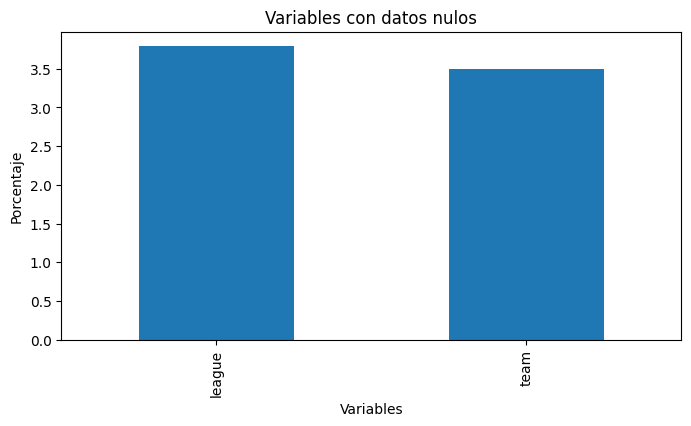

In [ ]:
## Se agrega una vista por Grafico de estas variables con datos nulos.
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
serie.plot(kind='bar')
plt.title("Variables con datos nulos")
plt.xlabel("Variables")
plt.ylabel("Porcentaje")

A partir de este análisis se ve que solo 2 atributos poseen datos nulos pero su porcentaje es muy bajo, menor al 4%.
Al mirar a fondo la información, eso te debe a que algunos jugadores al momento de relevamiento no contaban con un equipo/contrato y al no tener equipo tampoco tenian una liga a la cual pertenecer.


In [ ]:
## Ante el poco impacto y que se conoce el porque del dato nulo, se toma la decision: Reemplazar los datos nulos por el texto "sin equipo/liga"

base_fifa.fillna("sin equipo/liga", inplace=True)

In [ ]:
##Controlar que el cambio sea correcto y no se encuentren datos nulos.
base_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10000 non-null  int64 
 1   name        10000 non-null  object
 2   rating      10000 non-null  int64 
 3   card_type   10000 non-null  object
 4   position    10000 non-null  object
 5   nation      10000 non-null  object
 6   league      10000 non-null  object
 7   team        10000 non-null  object
 8   PAC         10000 non-null  int64 
 9   SHO         10000 non-null  int64 
 10  PAS         10000 non-null  int64 
 11  DRI         10000 non-null  int64 
 12  DEF         10000 non-null  int64 
 13  PHY         10000 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 1.1+ MB


Ahora no se encuentran datos nulos en ningun atributo.


---



# Analisis de Variables Univariable

Text(0.5, 1.0, 'Historigrama de Rating')

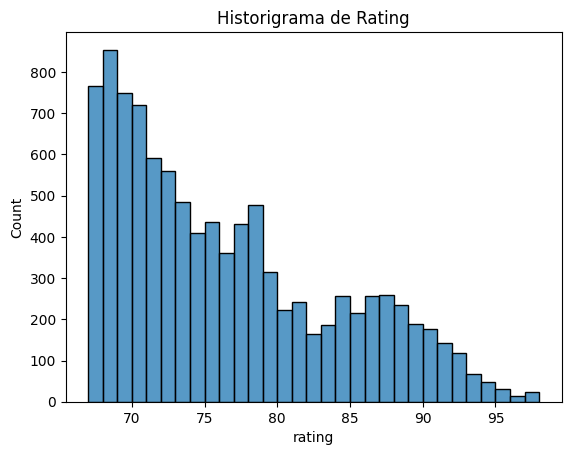

In [ ]:
sns.histplot(data=base_fifa, x="rating")
plt.title("Historigrama de Rating")

⚫ Con este histograma realizado sobre el "rating", puntaje general,  donde se puede apreciar que la mayoría de valores se agrupan entorno a los 70 puntos y que presenta una distribución sesgada a la izquierda, esto quiere decir que la moda es menor a la mediana.


---



Text(0.5, 1.0, 'Boxplot de Rating')

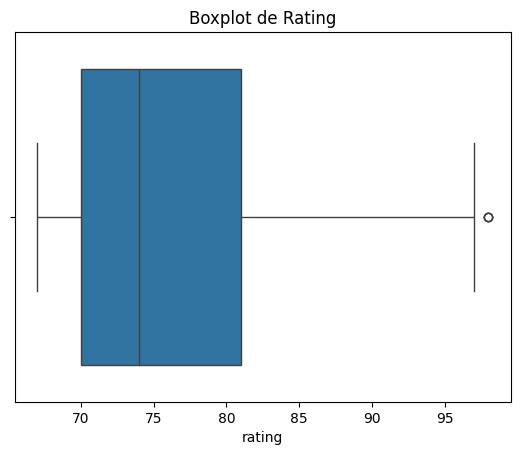

In [ ]:
sns.boxplot(x="rating", data=base_fifa)
plt.title("Boxplot de Rating")

⚫Boxplot de la variable "rating", donde se ve que el 50% de los datos se encuentra entre 70 y 81 aproximadamente y una mediana de 74 aprox. Se confirma lo observado en el histograma, que la moda (70 aprox) es menor a la mediana.


---




Text(0.5, 1.0, 'Boxplot de PAC - Velocidad')

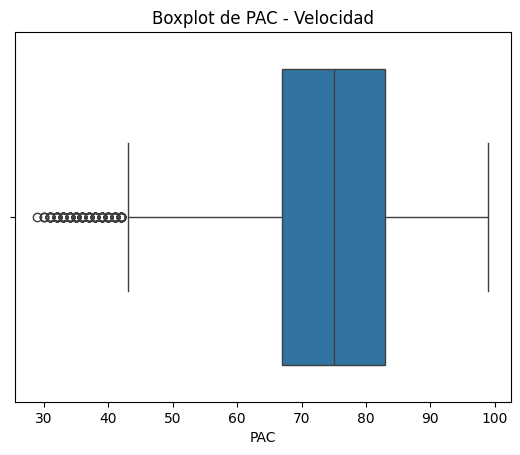

In [ ]:
sns.boxplot(x="PAC", data=base_fifa)
plt.title("Boxplot de PAC - Velocidad")

⚫Boxplot de velocidad, donde se puede ver mediana en 74, la mitad de los datos se agrupa entre 68 y 82 aproximadamente. Se puede ver tambien muchos valores atipicos, de estos, ninguno es nulo.


---



Text(0.5, 1.0, 'Boxplot de SHO - Disparo')

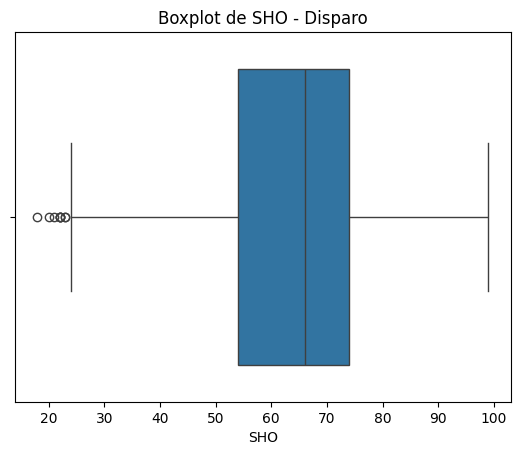

In [ ]:
sns.boxplot(x="SHO", data=base_fifa)
plt.title("Boxplot de SHO - Disparo")

⚫Boxplot de disparo, donde se puede ver mediana en 68, la mitad de los datos se agrupa entre 55 y 75 aproximadamente. Se puede ver tambien muchos valores atipicos.


---



Text(0.5, 1.0, 'Boxplot de PAS - Pase')

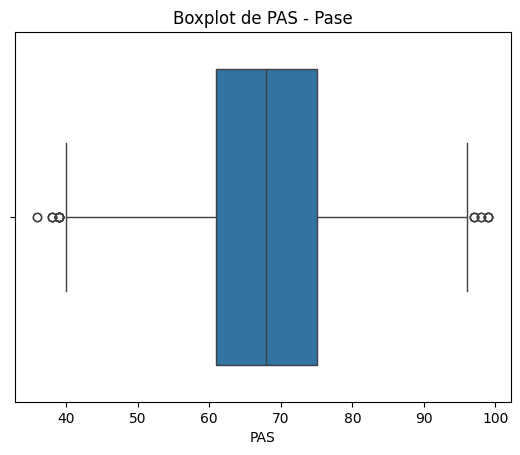

In [ ]:
sns.boxplot(x="PAS", data=base_fifa)
plt.title("Boxplot de PAS - Pase")

⚫Boxplot de pase, donde se puede ver mediana en 68, la mitad de los datos se agrupa entre 61 y 75 aproximadamente. Hay pocos valores atipicos.


---



Text(0.5, 1.0, 'Boxplot de DRI - Regate')

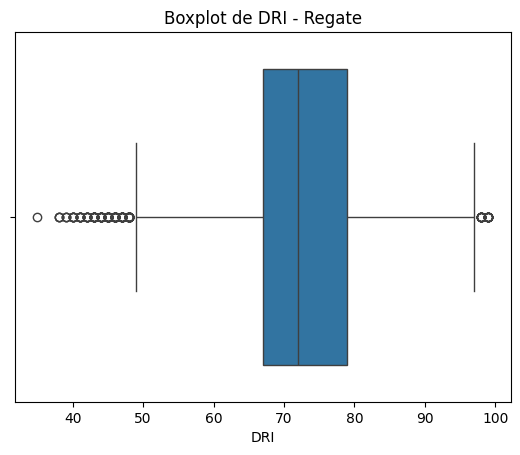

In [ ]:
sns.boxplot(x="DRI", data=base_fifa)
plt.title("Boxplot de DRI - Regate")

⚫Boxplot de regate, donde se puede ver mediana en 72, la mitad de los datos se agrupa entre 68 y 78 aproximadamente. Se puede ver tambien muchos valores atipicos, de estos, ninguno es nulo.


---



Text(0.5, 1.0, 'Boxplot de PHY - Fisicalidad')

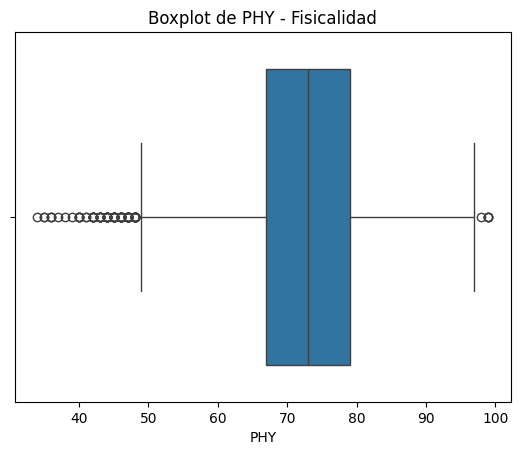

In [ ]:
sns.boxplot(x="PHY", data=base_fifa)
plt.title("Boxplot de PHY - Fisicalidad")

⚫Boxplot de fisicalidad, donde se puede ver mediana en 73, la mitad de los datos se agrupa entre 68 y 79 aproximadamente. Se puede ver tambien muchos valores atipicos, de estos, ninguno es nulo.

Text(0.5, 1.0, 'Boxplot de DEF - Defensa')

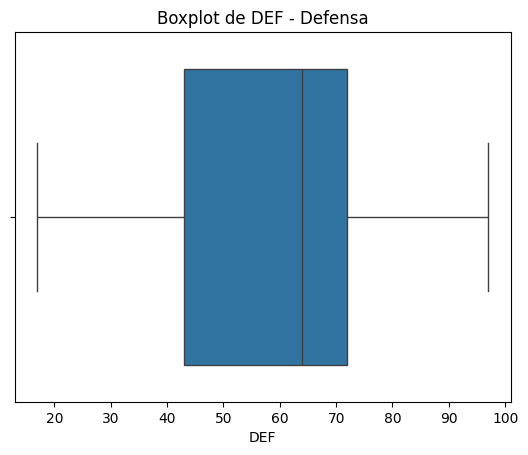

In [ ]:
sns.boxplot(x="DEF", data=base_fifa)
plt.title("Boxplot de DEF - Defensa")

⚫Boxplot de defensa, donde se puede ver mediana en 64, la mitad de los datos se agrupa entre 44 y 72 aproximadamente. No existen valores atipicos.

# Analisis de Variables Bivariable

Text(0.5, 1.0, 'Variabilidad de Rating según la Posición')

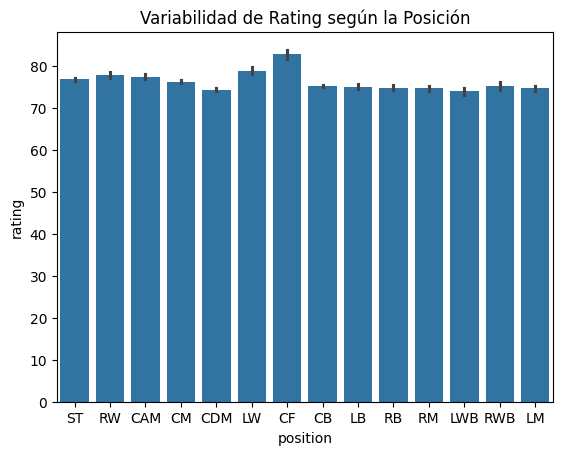

In [ ]:
sns.barplot(x="position", y= "rating", data=base_fifa)
plt.title("Variabilidad de Rating según la Posición")

⚫Gráfico de torta donde se compara las posiciones y el rating de los jugadores, en este se puede ver que la posiciones con mejor rating son las de "CF"y "LW".

❗ **Con esta observación en particular se puede en principio contestar la primer hipótesis con respecto a la relación entre la posición y el puntaje general ya que las posiciones atribuibles a delanteros tienen los mejores puntajes y las posiciones como defensores presentan valores menores.**







Text(0.5, 1.0, 'Variabilidad de Velocidad según la Posición')

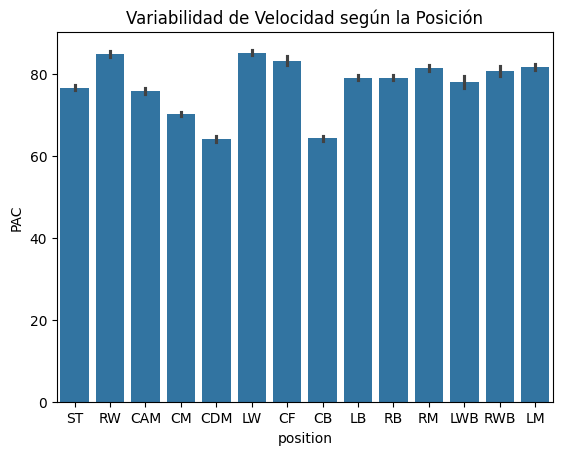

In [ ]:
sns.barplot(x="position", y= "PAC", data=base_fifa)
plt.title("Variabilidad de Velocidad según la Posición")

⚫Gráfico de torta para mostrar la relación entre la posición y la velocidad, se ve que los mejores puntajes los llevan (LW CF RW), todas posiciones orientadas a delanteros y los menores puntajes los tienen (CB CDM) ambas posiciones de defensores.

Text(0.5, 1.0, 'Variabilidad de Disparo según la Posición')

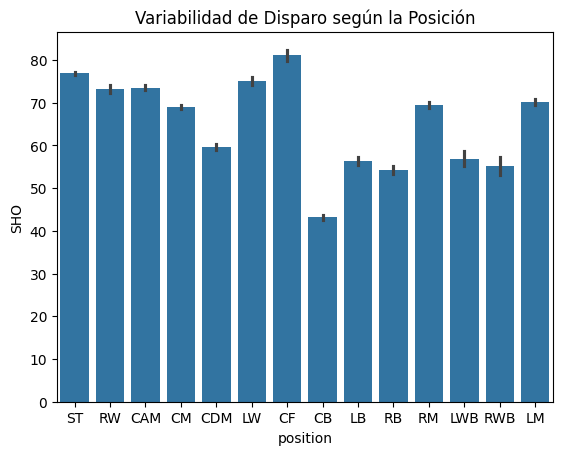

In [ ]:
sns.barplot(x="position", y= "SHO", data=base_fifa)
plt.title("Variabilidad de Disparo según la Posición")

⚫Gráfico de torta para mostrar la relación entre la posición y el disparo, se ve que los mejores puntajes los llevan (LW CF), todas posiciones orientadas a delanteros y los menores puntajes los tienen (CB LB CDM) todas posiciones de defensores.

❗ **Si miramos estos 2 últimos gráficos se podría llegar a intuir que hipótesis sobre los atributos y la posición también es correcta, en principio existe una relación, se podría decir que hay atributos más desarrollados en algunas posiciones más que en otras.**


Text(0.5, 1.0, 'Variabilidad de Rating según Liga')

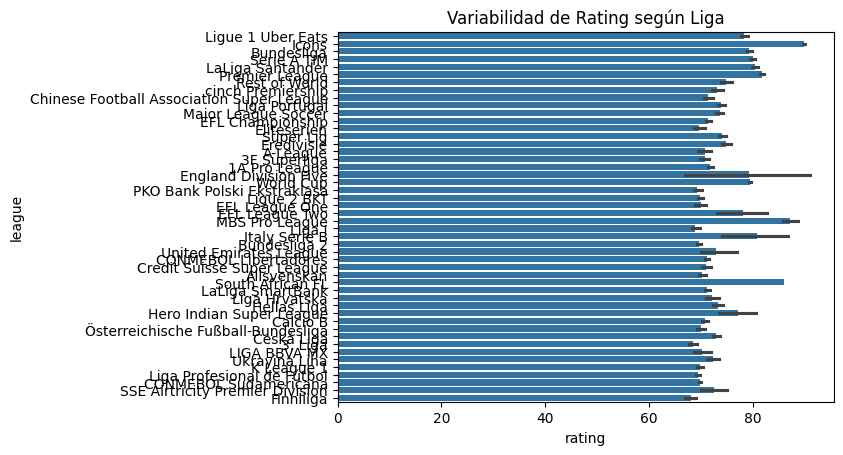

In [ ]:
sns.barplot(x="rating", y= "league", data=base_fifa)
figsize=(30, 30)
plt.title("Variabilidad de Rating según Liga")

⚫En este grafico se puede observar que exiten ligas donde hay valores generales muy altos a comparativos de otras ligas, pudiendo comenzar a responder la hiptesis sobre que las ligas mas prestigiosas tienen los jugadores con mejores puntajes.
En particular este grafico, a efectos de hacerlo mas entendible se busca el valor de la rating promedio de liga, crea lista top 10 y se la grafica en el siguiente paso.

Text(0.5, 1.0, 'Variabilidad de Rating según Liga - TOP 10')

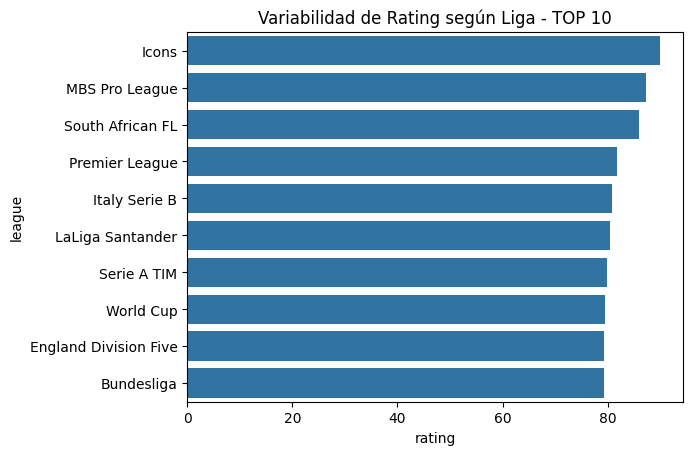

In [ ]:
liga_promedio = base_fifa.groupby('league')['rating'].mean().reset_index()
liga_top_10 = liga_promedio.sort_values(by='rating', ascending=False).head(10)
sns.barplot(x='rating', y='league', data=liga_top_10)
plt.title("Variabilidad de Rating según Liga - TOP 10")

❗ **A partir de este graficos se puede analizar y ver que en efecto, en respuesta a la hipotesis de si la liga y el puntaje promedio podrian tener una relacion, se puede ver que los mejores puntajes, de 80 o mas, se encuenta entre las ligas mas reconocidas del mundo como lo son las Ligas Española, Inglesa, Alemana, Italiana. Es cierto modo, es esperable que las mejores ligas atraigan a los mejores jugadores.**

Text(0.5, 1.0, 'Variabilidad de Rating según la Nacion')

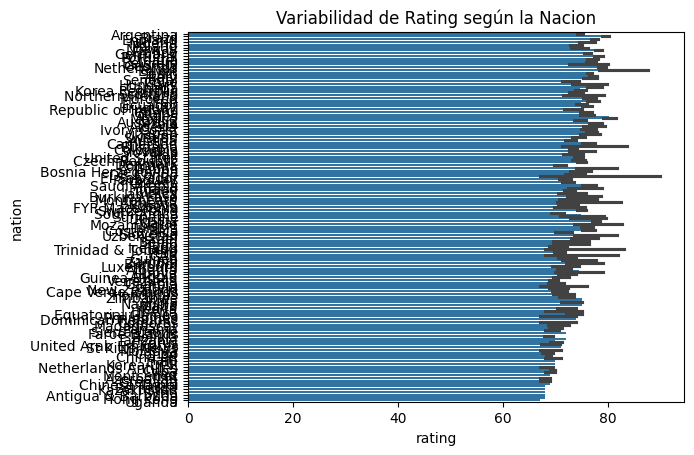

In [ ]:
sns.barplot(x="rating", y= "nation", data=base_fifa)
figsize=(30, 30)
plt.title("Variabilidad de Rating según la Nacion")

⚫En este grafico se puede ver existen paises con mejores puntajes, en particular este grafico, a efectos de hacerlo mas entendible se crea lista de pais promedio de rating, lista top 10 y se lo grafica.

Text(0.5, 1.0, 'Variabilidad de Rating según Nacion - TOP 10')

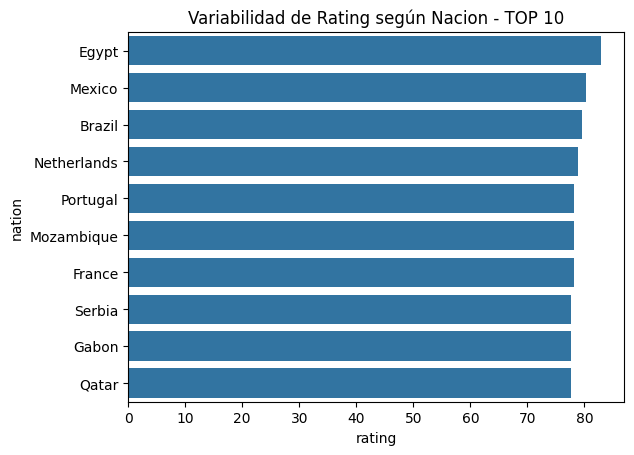

In [ ]:
pais_promedio = base_fifa.groupby('nation')['rating'].mean().reset_index()
pais_top_10 = pais_promedio.sort_values(by='rating', ascending=False).head(10)
sns.barplot(x='rating', y='nation', data=pais_top_10)
plt.title("Variabilidad de Rating según Nacion - TOP 10")

⚫Con este grafico se ven los paises que en promedio tienen jugadores con mejor rating, algunos son reconocidos mundialmente como Brazil, Francia, Holanda, pero tambien se ven algunos paises que no presentan muchos jugadores conocidos mundialmente.



---



# Feature selection:

Para poder realizar un analisis de las variables mas importantes se realiza el medodo de "Forward Seleccion"

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm


In [ ]:
!pip install mlxtend

In [ ]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:

X = base_fifa[['PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']]
y = base_fifa['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
selected_features = []
for i in range(X.shape[1]):
    best_feature = None
    best_mse = float('inf')
    for feature in X.columns:
        if feature not in selected_features:
            current_features = selected_features + [feature]
            model.fit(X_train[current_features], y_train)
            y_pred = model.predict(X_test[current_features])
            mse = mean_squared_error(y_test, y_pred)

            if mse < best_mse:
                best_mse = mse
                best_feature = feature

    if best_feature is not None:
        selected_features.append(best_feature)
        print(f"Step {i + 1}: Selected feature - {best_feature}, MSE: {best_mse}")

    print("\nFinal selected features:", selected_features)

Step 1: Selected feature - PAS, MSE: 24.530729777579737

Final selected features: ['PAS']
Step 2: Selected feature - PHY, MSE: 15.923647598969001

Final selected features: ['PAS', 'PHY']
Step 3: Selected feature - DRI, MSE: 13.086388774418433

Final selected features: ['PAS', 'PHY', 'DRI']
Step 4: Selected feature - DEF, MSE: 12.824844168594598

Final selected features: ['PAS', 'PHY', 'DRI', 'DEF']
Step 5: Selected feature - PAC, MSE: 12.79494323054477

Final selected features: ['PAS', 'PHY', 'DRI', 'DEF', 'PAC']
Step 6: Selected feature - SHO, MSE: 12.795372133445078

Final selected features: ['PAS', 'PHY', 'DRI', 'DEF', 'PAC', 'SHO']


In [ ]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=4,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
sfs.fit(X, y)
sfs.k_feature_names_

('PAS', 'DRI', 'DEF', 'PHY')

**Conclusiones**:

⚫  Se elijio el metodo de Forward selection, viendo que el dataset es muy grande y queriendo en principio poder determinar si algunas variables son mas importantes que otras.

⚫ Del modelo se observo que en 4 se encuentra el menor MSE, y por regresion lineal se que estas 4 "mas relevantes" son (PAS,DRI,DEF,PHY). Esto quiere decir que en principio si se quiere predecir el valor del Rating esas variables son mas determinantes en el valor del mismo.









R^2 Score: 0.7749814391079197


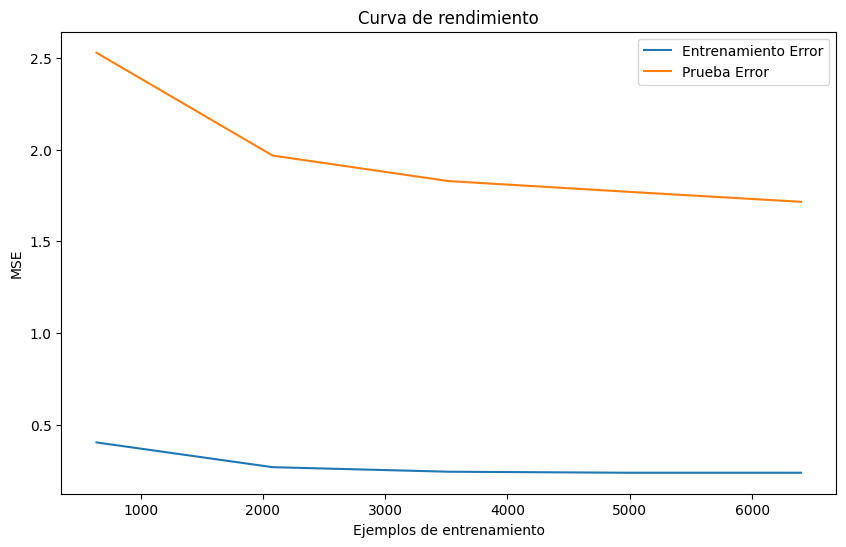

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Inicializar un modelo RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Obtener curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcular el promedio y la desviación estándar de las puntuaciones
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# Calcula el Coeficiente de Determinación (R^2)
r2 = r2_score(y_test, y_pred)
print('R^2 Score:', r2)

# Visualizar las curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Entrenamiento Error')
plt.plot(train_sizes, test_scores_mean, label='Prueba Error')
plt.title('Curva de rendimiento')
plt.xlabel('Ejemplos de entrenamiento')
plt.ylabel('MSE')
plt.legend()
plt.show()

**Conclusion:**

⚫En el grafico podemos ver que existe una brecha, pero la misma es aproximadamente de solo 2 puntos, lo que quiere decir que el modelo se ajusta bien a los datos, sin ser demasiado preciso y teniendo un maneger de error tolerable. Por ende interpreto que el en este caso hay poca Tendencia a Overfitting.

# APLICACION  Y MEDICION MODELO DE ML : REGRESION LINEAL



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = base_fifa[['PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']]
y = base_fifa['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Modelo de regresión lineal
model = LinearRegression()

# Entrenamiento del modelo
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# Calculo del Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Calcula el Coeficiente de Determinación (R^2)
r2 = r2_score(y_test, y_pred)
print('R^2 Score:', r2)

Mean Squared Error: 12.795372133445081
R^2 Score: 0.7749814391079197


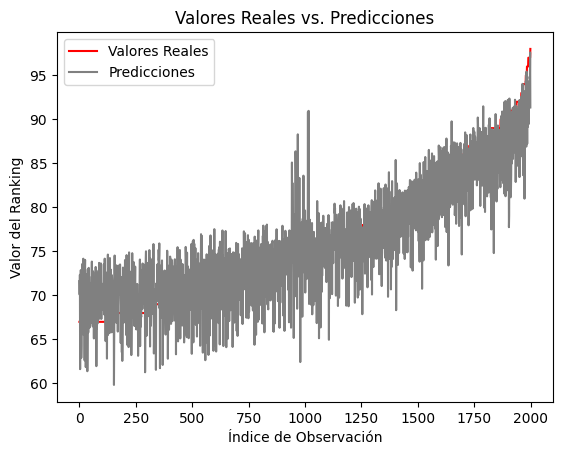

In [ ]:
#Visualizacion
import matplotlib.pyplot as plt

# Ordena los valores reales y predichos para que estén en el mismo orden
y_test_sorted = y_test.sort_values()
y_pred_sorted = y_pred[np.argsort(y_test)]

# Crea un gráfico de líneas para los valores reales
plt.plot(range(len(y_test)), y_test_sorted, color='red', label='Valores Reales')

# Crea un gráfico de líneas para las predicciones
plt.plot(range(len(y_pred)), y_pred_sorted, color='grey', label='Predicciones')

# Añade etiquetas y título
plt.xlabel('Índice de Observación')
plt.ylabel('Valor del Ranking')
plt.title('Valores Reales vs. Predicciones')

# Añade una leyenda
plt.legend()

# Muestra el gráfico
plt.show()

Conclusion:

⚫Estos resultados indican que el modelo de regresión lineal que se entreno tiene un rendimiento bastante bueno, con un MSE relativamente bajo y un R^2 Score considerablemente alto, lo que sugiere que el modelo es capaz de hacer predicciones razonablemente precisas sobre el ranking de los jugadores.

# APLICACION  Y MEDICION MODELO DE ML : RAMDOM FOREST REGRESSOR

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Crea una instancia del modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Entrena el modelo utilizando los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Realiza predicciones sobre los datos de prueba
y_pred_rf = rf_model.predict(X_test)

# Calcula el Error Cuadrático Medio (MSE)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Mean Squared Error (Random Forest):', mse_rf)

# Calcula el Coeficiente de Determinación (R^2)
r2_rf = r2_score(y_test, y_pred_rf)
print('R^2 Score (Random Forest):', r2_rf)

Mean Squared Error (Random Forest): 1.9822709499999998
R^2 Score (Random Forest): 0.965139915290054


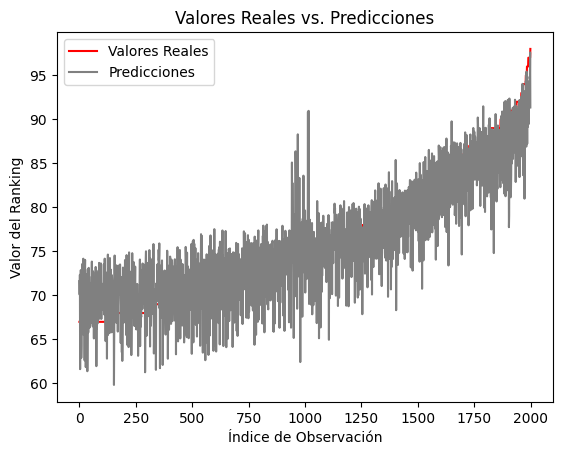

In [ ]:

#Visualizacion
import matplotlib.pyplot as plt

# Ordena los valores reales y predichos para que estén en el mismo orden
y_test_sorted = y_test.sort_values()
y_pred_sorted = y_pred[np.argsort(y_test)]

# Crea un gráfico de líneas para los valores reales
plt.plot(range(len(y_test)), y_test_sorted, color='red', label='Valores Reales')

# Crea un gráfico de líneas para las predicciones
plt.plot(range(len(y_pred)), y_pred_sorted, color='grey', label='Predicciones')

# Añade etiquetas y título
plt.xlabel('Índice de Observación')
plt.ylabel('Valor del Ranking')
plt.title('Valores Reales vs. Predicciones')

# Añade una leyenda
plt.legend()

# Muestra el gráfico
plt.show()

Conclusion:

⚫El modelo de Ramdon Forest arroja resultados aun mejores ya que el MSE es signigicativamente mejor al de regresion lineal (12,79 vs 1.98) y el R2 tambien es mejor (96 vs 77) lo que sugiere que el modelo de Bosque Aleatorio explica la mayoría de la variabilidad en el valor del ranking de los jugadores.